In [83]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
sa1 = gpd.read_file("Shape\sa1_to_poa.gpkg")
pred_evs_sa1 = pd.read_csv("Data\pred_evs_sa1_int.csv")
corr_df = pd.read_csv('Data\\feature_selection\\att_rank_pearson.csv')[["key", "pearson_score", "p_value"]].dropna()

In [85]:
sa1_poa = sa1[["SA1_CODE21", "POA_CODE21"]]
synthetic["SA1"] = synthetic["SA1"].astype(str)
synthetic_merged = sa1_poa.merge(synthetic, left_on="SA1_CODE21", right_on="SA1", how="right")

synthetic_merged = synthetic_merged.dropna().drop(columns="SA1")
synthetic_bins = synthetic_merged.copy()

inc_bins = [-1, 0, 149, 299, 399, 499, 649, 799, 999, 1249, 1499, 1749, 1999, 2499, 2999, 3499, 3999, 4499, 4999, 5999, 7999, np.inf]
hhsize_bins = [1, 2, 3, 4, 5, 6, 7, np.inf]
vehs_bins = [-1, 0, 1, 2, 3, np.inf]
synthetic_bins["INC_bins"] = pd.cut(synthetic_bins["INC"], bins=inc_bins)
synthetic_bins["HHSIZE_bins"] = pd.cut(synthetic_bins["HHSIZE"], bins=hhsize_bins)
synthetic_bins["TOTALVEHS_bins"] = pd.cut(synthetic_bins["TOTALVEHS"], bins=vehs_bins)

#synthetic_bins = synthetic_bins.drop(columns=["HHSIZE", "TOTALVEHS", "INC", "HHSIZE_normalised", "TOTALVEHS_normalised", "INC_normalised"])
synthetic_bins = synthetic_bins.drop(columns=["HHSIZE", "TOTALVEHS", "INC"])
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['INC_bins'], prefix='INC')
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['HHSIZE_bins'], prefix='HHSIZE')
synthetic_bins = pd.get_dummies(synthetic_bins, columns=['TOTALVEHS_bins'], prefix='TOTALVEHS')

synthetic_bins

,SA1_CODE21,POA_CODE21,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,...,"HHSIZE_(3.0, 4.0]","HHSIZE_(4.0, 5.0]","HHSIZE_(5.0, 6.0]","HHSIZE_(6.0, 7.0]","HHSIZE_(7.0, inf]","TOTALVEHS_(-1.0, 0.0]","TOTALVEHS_(0.0, 1.0]","TOTALVEHS_(1.0, 2.0]","TOTALVEHS_(2.0, 3.0]","TOTALVEHS_(3.0, inf]"
3465,20301103507,3331,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3466,20301103507,3331,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3467,20301103507,3331,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3468,20301103507,3331,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3469,20301103507,3331,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900994,21402159223,3931,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1900995,21402159223,3931,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1900996,21402159223,3931,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1900997,21402159223,3931,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [86]:
# Your dictionary data
multiplier_df = corr_df

# Sample DataFrame to be multiplied
df = synthetic_bins.drop(columns=["SA1_CODE21", "POA_CODE21"])

# Create a dictionary from the multiplier DataFrame
multiplier_dict = dict(zip(multiplier_df['key'], multiplier_df['pearson_score']))

In [87]:
df_result = df * df.columns.map(multiplier_dict)
df_result["score"] = df_result.sum(axis=1)
df_result[["SA1_CODE21", "POA_CODE21"]] = synthetic_bins[["SA1_CODE21", "POA_CODE21"]]
df_result["house_id"] = df_result.index


move_columns = ["house_id", "score", "SA1_CODE21", "POA_CODE21"]

df_result = df_result[move_columns + [col for col in df_result.columns if col not in move_columns]]
df_result

,house_id,score,SA1_CODE21,POA_CODE21,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,...,"HHSIZE_(3.0, 4.0]","HHSIZE_(4.0, 5.0]","HHSIZE_(5.0, 6.0]","HHSIZE_(6.0, 7.0]","HHSIZE_(7.0, inf]","TOTALVEHS_(-1.0, 0.0]","TOTALVEHS_(0.0, 1.0]","TOTALVEHS_(1.0, 2.0]","TOTALVEHS_(2.0, 3.0]","TOTALVEHS_(3.0, inf]"
3465,3465,0.161799,20301103507,3331,0.000000,-0.000000,-0.085829,0.0,0.119079,0.000000,...,0.0,0.000000,0.109337,0.000000,0.000000,0.000000,0.000000,0.00000,-0.000000,-0.066105
3466,3466,0.098338,20301103507,3331,0.000000,-0.000000,-0.085829,0.0,0.000000,0.069819,...,0.0,0.000000,0.000000,0.133334,0.000000,0.000000,0.000000,0.00000,-0.031328,-0.000000
3467,3467,0.194526,20301103507,3331,0.000000,-0.000000,-0.085829,0.0,0.119079,0.000000,...,0.0,0.000000,0.000000,0.000000,0.173777,0.000000,0.000000,0.09801,-0.000000,-0.000000
3468,3468,0.390354,20301103507,3331,0.000000,-0.000000,-0.085829,0.0,0.119079,0.000000,...,0.0,0.000000,0.000000,0.000000,0.173777,0.000000,0.000000,0.09801,-0.000000,-0.000000
3469,3469,0.235950,20301103507,3331,0.000000,-0.000000,-0.085829,0.0,0.119079,0.000000,...,0.0,0.143493,0.000000,0.000000,0.000000,0.000000,0.000000,0.09801,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900994,1900994,0.021787,21402159223,3931,0.000000,-0.018405,-0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.043533,0.00000,-0.000000,-0.000000
1900995,1900995,0.055612,21402159223,3931,0.000000,-0.000000,-0.085829,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.09801,-0.000000,-0.000000
1900996,1900996,0.187360,21402159223,3931,0.000000,-0.000000,-0.085829,0.0,0.119079,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.043533,0.00000,-0.000000,-0.000000
1900997,1900997,0.363705,21402159223,3931,0.077724,-0.000000,-0.000000,0.0,0.000000,0.069819,...,0.0,0.000000,0.000000,0.000000,0.000000,0.058811,0.000000,0.00000,-0.000000,-0.000000


In [88]:
df_result["assign_ev"] = 0
df_result.sort_values(by="score", ascending=False, inplace=True)

## Run to generate ev_pop

In [115]:
# def assign_ev_by_sa1(df, sa1_code, x):
#     mask = df['SA1_CODE21'] == sa1_code
#     rows_to_assign = np.where(mask)[0][:x]
#     df.loc[rows_to_assign, 'assign_ev'] = 1

# # Initialize df_result with 'assign_ev' column filled with 0
# df_result['assign_ev'] = 0

# # Create a dictionary to store the required x values for each SA1_CODE21
# x_values_dict = dict(zip(pred_evs_sa1['SA1_CODE21'], pred_evs_sa1['int_evs']))

# # Loop through unique SA1_CODE21 values and update 'assign_ev' in a vectorized way
# i = 0
# df_result.reset_index(drop=True, inplace=True)

# for sa1_code in df_result['SA1_CODE21'].unique():
#     if i %100 == 0:
#         print(i)
        
#     i += 1
#     x_value = x_values_dict.get(int(sa1_code), 0)
#     if x_value > 0:
#         assign_ev_by_sa1(df_result, sa1_code, x_value)

# # Reset the index of df_result if needed
# df_result.reset_index(drop=True, inplace=True)
# df_result.to_csv("Data\ev_assign_pop.csv", index=False)

# Plotting 

In [116]:
sa1 = gpd.read_file("Shape\sa1_to_poa.gpkg")
ev_pop = pd.read_csv("Data\ev_assign_pop.csv")

In [125]:
ev_pop["assign_ev"].sum()

6296

<Axes: >

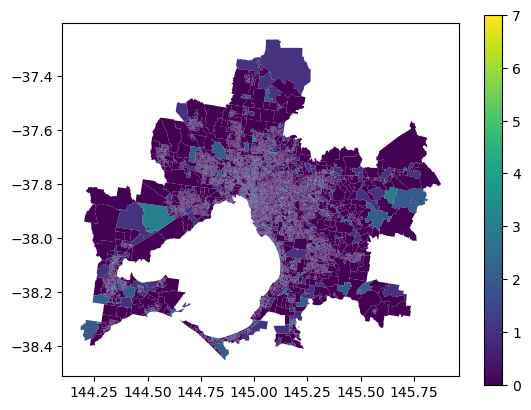

In [122]:
sa1["SA1_CODE21"] = sa1["SA1_CODE21"].astype(str)
ev_pop["SA1_CODE21"] = ev_pop["SA1_CODE21"].astype(str)
merged = sa1.merge(ev_pop.groupby("SA1_CODE21").sum("assign_ev"), on="SA1_CODE21", how="left")
merged["assign_ev"].fillna(0, inplace=True)
merged.plot(column="assign_ev", legend=True, cmap='viridis')